# TP4 - Detecting Credit Card Fraud
## Mateus Ribeiro da Silva

In [85]:
#Importing some libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
#Importing datasets
transactions_a = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectCCF/data/creditcard_a.csv")

transactions_b = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectCCF/data/creditcard_b.csv")

transactions_full = pd.concat([transactions_a, transactions_b], axis=0)

## Exploratory Data Analysis

In [12]:
#Some general informations about dataset
transactions_full.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#Verify if there are some null values in dataset
transactions_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 96545
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284

There are not null values in dataset, so it will not be necessary fill or exclude data. Once we have only numerical data, dummies transformation will not be necessary as well.

The dataset does not give us the features name, so we cannot assume what is the importance of each variable. The unique known features are time and amount, where 'time' indicates the seconds elapsed beetween each transaction, that is a potential indication when a fraud ocorrurs. The 'amount' show the transaction amount.

In [11]:
#Verify how the class is distributed beetween fraud and not fraud cases
transactions_full.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

The amount of not fraud ('0' - Not Fraud) cases are greatest than fraud ('1' - Fraud), therefore, we need to take care about the splitting data, else there is the possibility that model does not learn how identify fraud cases.

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<bound method NDFrame._add_numeric_operations.<locals>.mean of count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64>

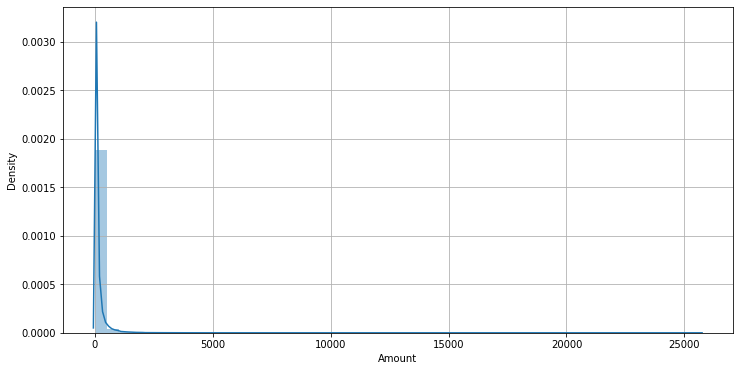

In [20]:
#Verify how is the probabilistic distribution of transactions amounts.
plt.figure(figsize=(12,6))
plt.grid()
sns.distplot(transactions_full.Amount)
transactions_full.describe()['Amount'].mean

Large part of the transactions amount is about 88. We can see the relation beetween the amount and frauds cases.

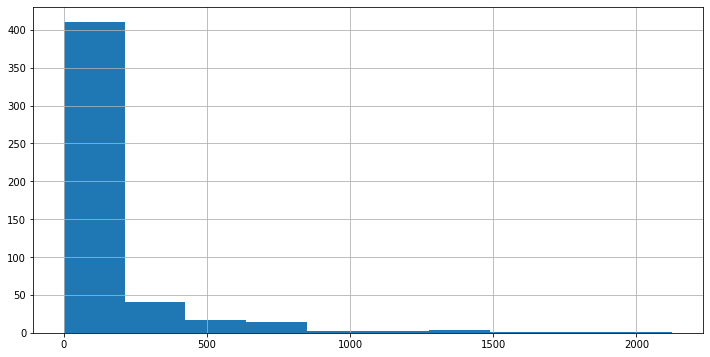

In [28]:
# Count of frauds vs Amount
plt.figure(figsize=(12,6))
transactions_full[transactions_full['Class']==1]['Amount'].hist()

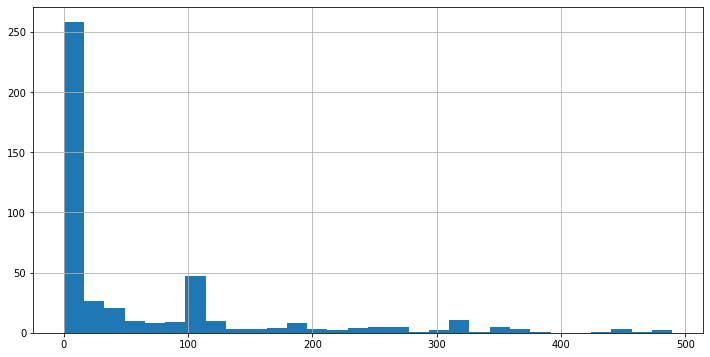

In [32]:
#Tacking a zoom for values below 500
plt.figure(figsize=(12,6))
transactions_full[(transactions_full['Class']==1) & (transactions_full['Amount']<500)]['Amount'].hist(bins=30)

As we can see, the great amount of frauds ocorrus with values below 100. There is some logical in such behaviour, once small values don't draw attention from system.

It is possible to analyse the relation beetween frauds and time elapsed in each transaction.

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<bound method NDFrame._add_numeric_operations.<locals>.mean of count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64>

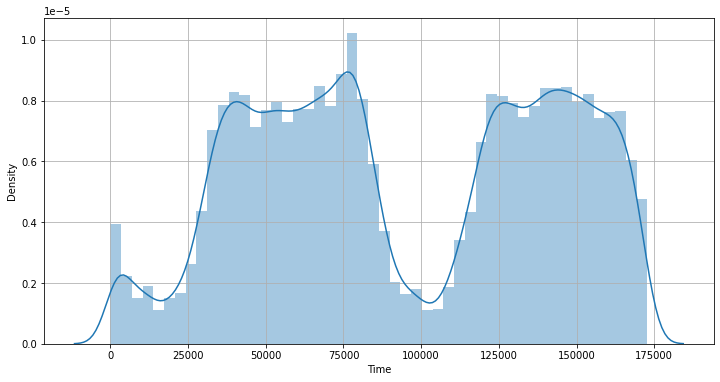

In [33]:
#Verify how is the probabilistic distribution of transactions time.
plt.figure(figsize=(12,6))
plt.grid()
sns.distplot(transactions_full.Time)
transactions_full.describe()['Time'].mean

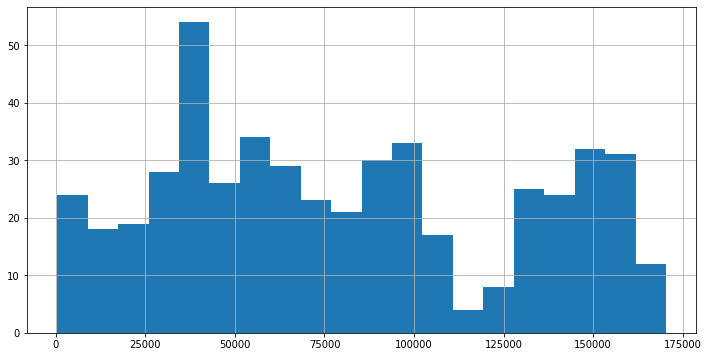

In [36]:
# Count of frauds vs Time
plt.figure(figsize=(12,6))
transactions_full[transactions_full['Class']==1]['Time'].hist(bins=20)

The time not seems to be strong correlated with fraud cases. The distribution do not tell us too much as well. So it is possible that we drop this information further.

## Pre Processing Data

The range of 'Amount' feature is too large, as well as 'Time'. We can reduce it using standardization.

In [40]:
#Instance StandardScaler class to standardization process
scaler = StandardScaler()

transactions_full['Amout Normalized'] = scaler.fit_transform(transactions_full['Amount'].values.reshape(-1, 1))
transactions_full['Time Normalized'] = scaler.fit_transform(transactions_full['Time'].values.reshape(-1, 1))

transactions_full = transactions_full.drop(['Amount', 'Time'], axis=1)

In [41]:
#Show new dataset
transactions_full.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amout Normalized,Time Normalized
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


The dataset is heavily imbalanced, which means that there are way more amount of non frauds than frauds cases. If we separate the dataset randomly, there is the chance that our model become overfitting, i.e, will assume that great part of predictions will be nom frauds. In order to overcome this problem, it will be created a dataset containing 50% of fraud cases and 50% of non fraud cases.

Fraud cases: 492


/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


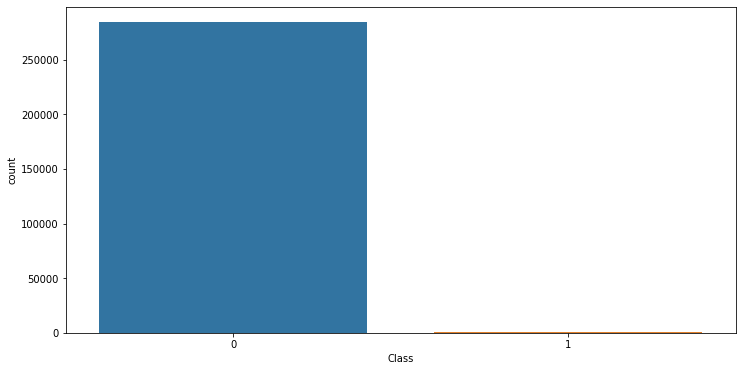

In [47]:
#Count the amount of fraud cases
plt.figure(figsize=(12,6))
sns.countplot(transactions_full['Class'])
print('Fraud cases:', transactions_full['Class'].value_counts()[1])

We have 492 fraud cases, so we are going to select 492 non fraud cases randomly. With this new dataset we will train the model, however, we will keep the original dataset for test purposes.

In [49]:
#Shuffle the dataset before get non fraud cases
transactions_full = transactions_full.sample(frac=1)

#Separate fraud cases from non fraud equally
fraud = transactions_full.loc[transactions_full['Class']==1]
non_fraud = transactions_full.loc[transactions_full['Class']==0][:492]

#Join the two parts in one dataframe
equal_df = pd.concat([fraud, non_fraud])

#Shuffle new dataset
equal_df = equal_df.sample(frac=1)

#Show new dataset
equal_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amout Normalized,Time Normalized
63863,-1.928613,4.601506,-7.124053,5.716088,1.026579,-3.189073,-2.261897,1.185096,-4.441942,-6.646154,...,-0.541287,-0.354639,-0.701492,-0.030973,0.034070,0.573393,0.294686,1,-0.350151,1.281336
77682,-10.363049,4.543672,-9.795898,5.508003,-6.037156,-0.133493,-11.724346,-3.198346,-4.767842,-9.332128,...,1.687257,0.977178,-0.543369,-0.289125,-0.107586,0.330642,0.163577,1,-0.349231,-0.792849
75616,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,-7.509557,...,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,1,-0.351710,1.396986
60710,-0.549615,2.219075,-3.522024,0.236995,1.087469,-1.235530,-0.279313,0.514361,-1.849927,-3.443819,...,0.210428,-0.366019,0.015803,0.349212,0.647302,0.171929,0.117188,1,-0.350191,1.250149
30181,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,-5.165331,...,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,1,0.429036,0.979323


In [50]:
#Info about new dataset
equal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 63863 to 29721
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   V1                984 non-null    float64
 1   V2                984 non-null    float64
 2   V3                984 non-null    float64
 3   V4                984 non-null    float64
 4   V5                984 non-null    float64
 5   V6                984 non-null    float64
 6   V7                984 non-null    float64
 7   V8                984 non-null    float64
 8   V9                984 non-null    float64
 9   V10               984 non-null    float64
 10  V11               984 non-null    float64
 11  V12               984 non-null    float64
 12  V13               984 non-null    float64
 13  V14               984 non-null    float64
 14  V15               984 non-null    float64
 15  V16               984 non-null    float64
 16  V17               984 non-null    floa

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


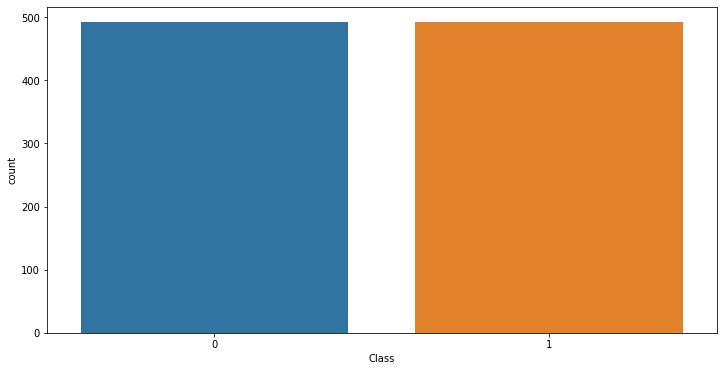

In [51]:
#Verify how class is distributed
plt.figure(figsize=(12,6))
sns.countplot(equal_df['Class'])

Now we have a new equally distributed dataset to train and test our model. However, as we can imagine, although the overfitting problem can be overcome, we discard a huge amount of information about non fraud cases, so there is the possibility that our model under performing.

In [55]:
#Split data
X = equal_df.drop('Class', axis=1)
y = equal_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Convert dataframe to array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## Design Classifiers

Now that we have splitted our dataset, let's train some kinds of classifiers and chosse the best approach to our problem. In this exercise we will verify KNN, Decision Tree, Suport Vector Machine and Logistic Regression. For better results, we are going to use GridSearch in ordert to find the best hyperparameters.

In [76]:
#Instance Classifiers

models = [('KNN', KNeighborsClassifier()),
          ('Logistic Regression', LogisticRegression()),
          ('Decision Trees', DecisionTreeClassifier()),
          ('Random Forest Classifier', RandomForestClassifier()),
          ('Suport Vector Machine', SVC())]

#Training and testing models
results, names = [], []

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    names.append(name)
    print(str(name) +':'+ str(scores.mean()*100)+'%')

KNN:93.08788380216951%
Logistic Regression:94.03750689464975%
Decision Trees:90.78599007170436%
Random Forest Classifier:94.1753998896856%
Suport Vector Machine:92.54642397499539%


As we can see, the Logistic Classifier got the best performance using cross validation. Let's use GridSearch to see if we can increase such score.

In [77]:
#hyperparameters for Logistic Regression

params_lg = {'penalty': ['l1', 'l2'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lg_grid = GridSearchCV(LogisticRegression(), params_lg, cv=5)

lg_grid.fit(X_train, y_train)

/home/mateusrib/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mateusrib/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mateusrib/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/mateusrib/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/mateusrib/.local/lib/python3.8/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [78]:
#Best estimator
lg_grid.best_estimator_

LogisticRegression(C=0.1)

In [79]:
#Best Score
lg_grid.best_score_

0.9403842618128332

In [80]:
#Best Parameters
lg_grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

The best estimator we got has the same performance than before.

In [96]:
#Scoring
lg_best = lg_grid.best_estimator_

predictions = lg_best.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       122
           1       0.98      0.91      0.95       124

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246

[[120   2]
 [ 11 113]]


As we can see, the model is predicting fraud very well, where it only miss 2 frauds cases.